In [1]:
# !pip install prophet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import prophet
from prophet import Prophet

In [3]:
df = pd.read_csv('NMDC.NS.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-06,147.500000,148.850006,142.800003,143.350006,122.500183,10206727
1,2021-10-07,144.850006,146.149994,143.449997,144.350006,123.354729,7219473
2,2021-10-08,145.449997,149.050003,144.350006,145.600006,124.422935,9488844
3,2021-10-11,146.399994,154.000000,146.000000,153.050003,130.789352,27537045
4,2021-10-12,154.800003,154.800003,149.300003,151.600006,129.550247,17011149


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       496 non-null    object 
 1   Open       496 non-null    float64
 2   High       496 non-null    float64
 3   Low        496 non-null    float64
 4   Close      496 non-null    float64
 5   Adj Close  496 non-null    float64
 6   Volume     496 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.2+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# Creating Dataset for date and open values(The required ones)

dataset = df[['Date','Open']]

In [28]:
dataset.tail()

,Date,Open
491,2023-09-28,142.949997
492,2023-09-29,143.350006
493,2023-10-03,149.600006
494,2023-10-04,148.000000
495,2023-10-05,146.899994


In [9]:
# Renaming the variables

df_prophet = dataset.rename(columns = {'Date':'ds','Open':'y'})

In [10]:
df_prophet.head()

,ds,y
0,2021-10-06,147.500000
1,2021-10-07,144.850006
2,2021-10-08,145.449997
3,2021-10-11,146.399994
4,2021-10-12,154.800003


### **Building model using Prophet**

In [11]:
from prophet import Prophet
m = Prophet()
model = m.fit(df_prophet)

03:25:09 - cmdstanpy - INFO - Chain [1] start processing
03:25:10 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
# Checking the Seasonalities of model

In [13]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

**Predicting for next 6 months**

In [14]:
future_date = model.make_future_dataframe(periods = 90 , freq ='D')

In [15]:
future_date.tail()

,ds
581,2023-12-30
582,2023-12-31
583,2024-01-01
584,2024-01-02
585,2024-01-03


### **# Making the prediction**

In [16]:
prediction = model.predict(future_date)

In [17]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-06,141.706913,129.985273,151.912184,141.706913,141.706913,-0.809099,-0.809099,-0.809099,-0.809099,-0.809099,-0.809099,0.0,0.0,0.0,140.897814
1,2021-10-07,141.745176,129.562268,150.562677,141.745176,141.745176,-0.920843,-0.920843,-0.920843,-0.920843,-0.920843,-0.920843,0.0,0.0,0.0,140.824332
2,2021-10-08,141.783438,129.380644,151.693458,141.783438,141.783438,-0.969360,-0.969360,-0.969360,-0.969360,-0.969360,-0.969360,0.0,0.0,0.0,140.814078
3,2021-10-11,141.898226,130.343826,151.486377,141.898226,141.898226,-0.926336,-0.926336,-0.926336,-0.926336,-0.926336,-0.926336,0.0,0.0,0.0,140.971890
4,2021-10-12,141.936489,131.021372,151.969577,141.936489,141.936489,-0.684627,-0.684627,-0.684627,-0.684627,-0.684627,-0.684627,0.0,0.0,0.0,141.251862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2023-12-30,152.661016,140.848070,167.957141,142.880625,160.267093,2.155133,2.155133,2.155133,2.155133,2.155133,2.155133,0.0,0.0,0.0,154.816149
582,2023-12-31,152.860212,140.202464,168.177159,142.809471,160.577965,2.155133,2.155133,2.155133,2.155133,2.155133,2.155133,0.0,0.0,0.0,155.015345
583,2024-01-01,153.059409,136.666265,165.471620,142.705667,160.851348,-0.926336,-0.926336,-0.926336,-0.926336,-0.926336,-0.926336,0.0,0.0,0.0,152.133073
584,2024-01-02,153.258605,137.703797,165.829651,142.726663,161.106648,-0.684627,-0.684627,-0.684627,-0.684627,-0.684627,-0.684627,0.0,0.0,0.0,152.573978


In [18]:
df.shape

(496, 7)

In [19]:
future_date.shape

(586, 1)

In [20]:
prediction[['ds','yhat_lower','yhat_upper','yhat']].tail(90)

,ds,yhat_lower,yhat_upper,yhat
496,2023-10-06,124.259063,144.926817,134.759962
497,2023-10-07,128.131848,148.833869,138.083652
498,2023-10-08,127.563761,149.735112,138.282848
499,2023-10-09,124.737478,146.150367,135.400576
500,2023-10-10,124.792097,146.182624,135.841481
...,...,...,...,...
581,2023-12-30,140.848070,167.957141,154.816149
582,2023-12-31,140.202464,168.177159,155.015345
583,2024-01-01,136.666265,165.471620,152.133073
584,2024-01-02,137.703797,165.829651,152.573978


###### yhat is the predicted value for the 'open' column's values where as yhat_lower and yhat_upper is the range of predictions

### Plotting the model

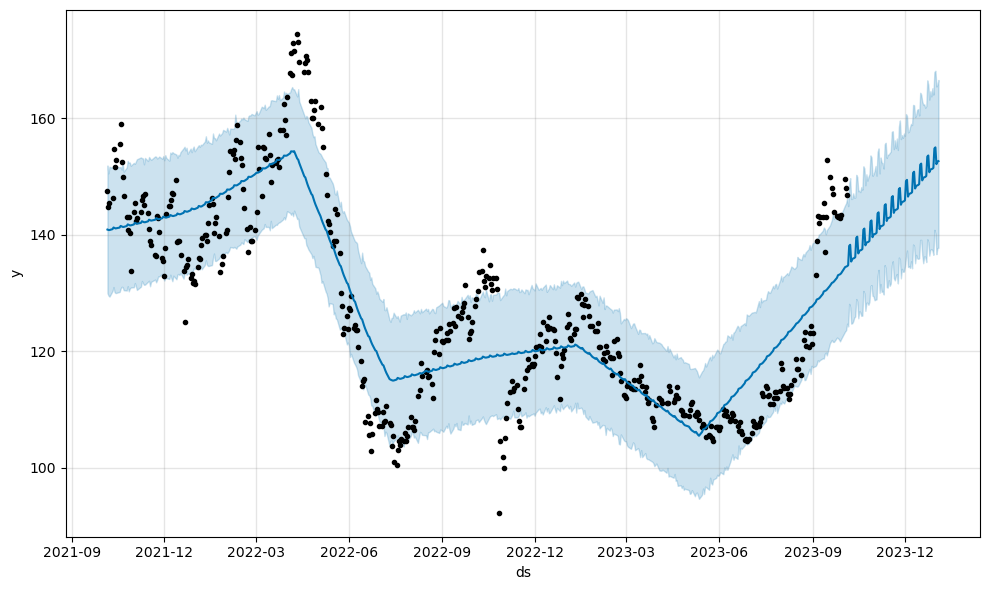

In [21]:
model.plot(prediction)
plt.show()

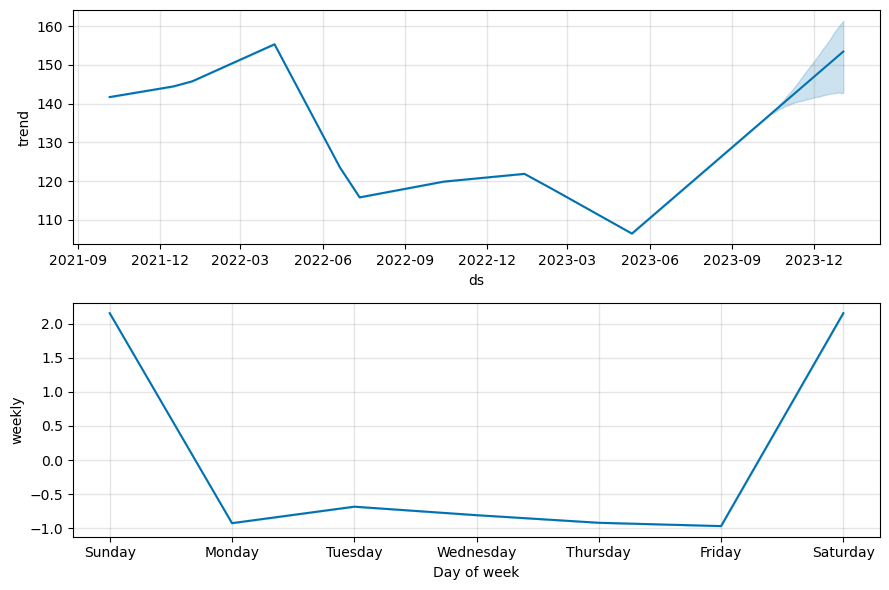

In [22]:
# Plotting the components of prediction to check the trend and seasonality
model.plot_components(prediction)
plt.show()

**Cross Validating the model with the initial training period as 45days with a forecast horizon of 10days for a rolling evaluation period of 5days**

In [23]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon = '10 days', period ='5days', initial='45days')

  0%|          | 0/135 [00:00<?, ?it/s]

03:25:11 - cmdstanpy - INFO - Chain [1] start processing
03:25:12 - cmdstanpy - INFO - Chain [1] done processing
03:25:12 - cmdstanpy - INFO - Chain [1] start processing
03:25:13 - cmdstanpy - INFO - Chain [1] done processing
03:25:13 - cmdstanpy - INFO - Chain [1] start processing
03:25:13 - cmdstanpy - INFO - Chain [1] done processing
03:25:13 - cmdstanpy - INFO - Chain [1] start processing
03:25:14 - cmdstanpy - INFO - Chain [1] done processing
03:25:14 - cmdstanpy - INFO - Chain [1] start processing
03:25:15 - cmdstanpy - INFO - Chain [1] done processing
03:25:15 - cmdstanpy - INFO - Chain [1] start processing
03:25:15 - cmdstanpy - INFO - Chain [1] done processing
03:25:15 - cmdstanpy - INFO - Chain [1] start processing
03:25:16 - cmdstanpy - INFO - Chain [1] done processing
03:25:16 - cmdstanpy - INFO - Chain [1] start processing
03:25:16 - cmdstanpy - INFO - Chain [1] done processing
03:25:16 - cmdstanpy - INFO - Chain [1] start processing
03:25:17 - cmdstanpy - INFO - Chain [1]

03:25:47 - cmdstanpy - INFO - Chain [1] done processing
03:25:47 - cmdstanpy - INFO - Chain [1] start processing
03:25:47 - cmdstanpy - INFO - Chain [1] done processing
03:25:47 - cmdstanpy - INFO - Chain [1] start processing
03:25:47 - cmdstanpy - INFO - Chain [1] done processing
03:25:48 - cmdstanpy - INFO - Chain [1] start processing
03:25:48 - cmdstanpy - INFO - Chain [1] done processing
03:25:48 - cmdstanpy - INFO - Chain [1] start processing
03:25:48 - cmdstanpy - INFO - Chain [1] done processing
03:25:48 - cmdstanpy - INFO - Chain [1] start processing
03:25:49 - cmdstanpy - INFO - Chain [1] done processing
03:25:49 - cmdstanpy - INFO - Chain [1] start processing
03:25:49 - cmdstanpy - INFO - Chain [1] done processing
03:25:49 - cmdstanpy - INFO - Chain [1] start processing
03:25:49 - cmdstanpy - INFO - Chain [1] done processing
03:25:50 - cmdstanpy - INFO - Chain [1] start processing
03:25:50 - cmdstanpy - INFO - Chain [1] done processing
03:25:50 - cmdstanpy - INFO - Chain [1] 

###### To check the 'Mean Square Error', 'Root Mean Square Error', 'Mean Absolute Error', 'Mean Absolute Percentage Error'

- The main component to check in the performance table is MAPE i.e Mean Absolute Percentage error, if
- MAPE < 10%       forecasting is considered to be highly accurate
- MAPE - 10%-20%   forecasting is considered to have a good accuracy
- MAPE - 20%-50%   forecasting can be said a reasonable forecasting

In [24]:
from prophet.diagnostics import performance_metrics

In [25]:
df_performance = performance_metrics(df_cv)

In [26]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,86.201255,9.284463,6.930882,0.055296,0.043083,0.055890,0.597826
1,2 days,113.529707,10.655032,7.696434,0.063435,0.045765,0.062666,0.617021
2,3 days,112.621998,10.612351,7.733185,0.062362,0.048686,0.062071,0.604533
3,4 days,95.910763,9.793404,7.521380,0.059856,0.047127,0.060300,0.610965
4,5 days,111.370819,10.553237,8.040715,0.063474,0.047596,0.064811,0.548387
5,6 days,119.817905,10.946137,8.294104,0.066138,0.053256,0.067005,0.549439
6,7 days,150.943860,12.285921,9.041039,0.074401,0.057639,0.073746,0.516129
7,8 days,165.137236,12.850573,9.616488,0.076925,0.057112,0.076718,0.510870
8,9 days,145.634634,12.067918,9.353373,0.074093,0.060842,0.074850,0.527292
9,10 days,163.144795,12.772815,9.782832,0.077356,0.059126,0.079138,0.516129


### ploting the metrics of cross-validations

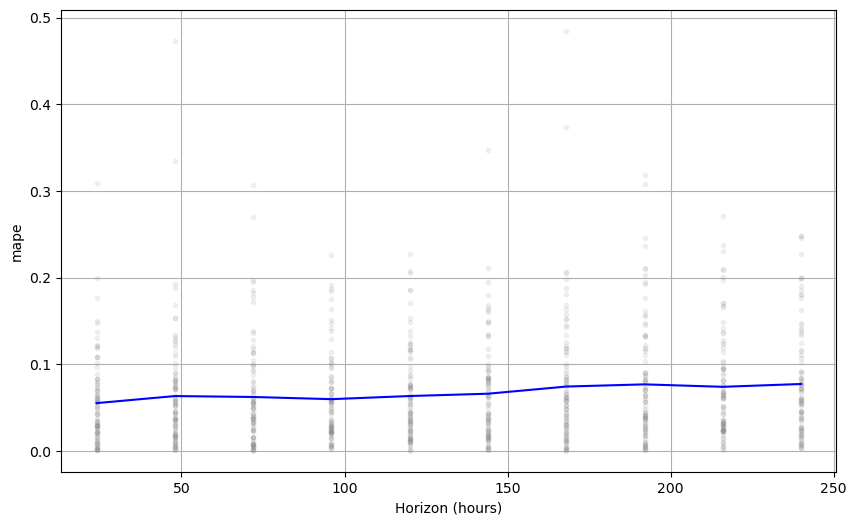

In [32]:
# MAPE expresses the average percentage difference between predicted and actual values.
# MAPE is useful for understanding prediction accuracy in percentage terms.
plot_cross_validation_metric(df_cv , metric='mape')
plt.show()

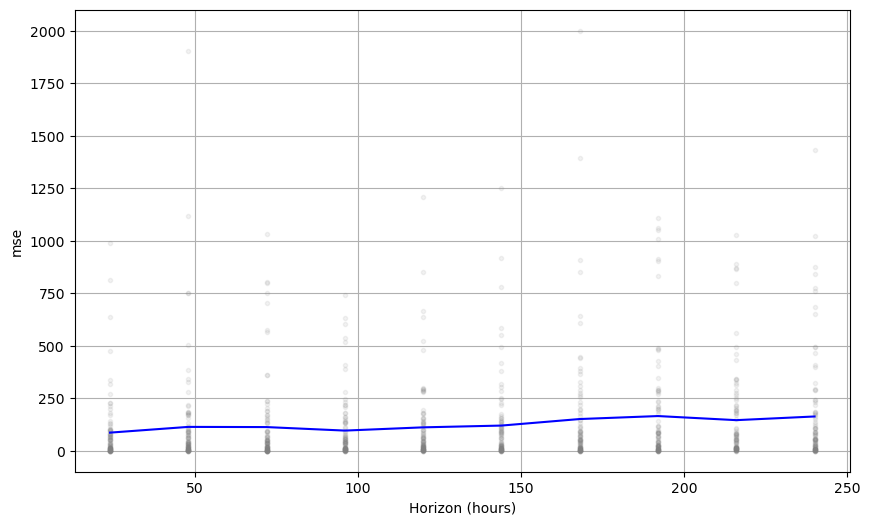

In [33]:
# MSE represents the average squared difference between predicted and actual values.
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv , metric='mse')
plt.show()

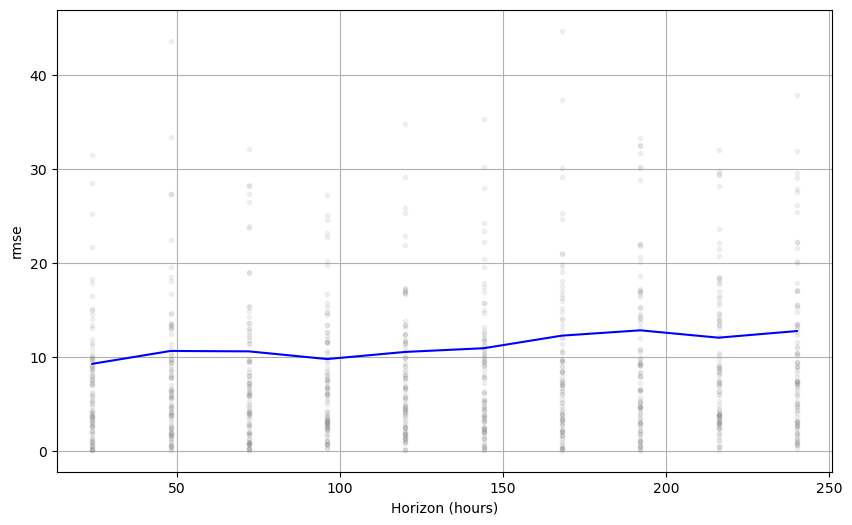

In [30]:
# RMSE is the square root of MSE and has the same unit as the predicted values.
plot_cross_validation_metric(df_cv , metric = 'rmse')
plt.show()